In [2]:
import numpy as np
import tensorflow as tf
import os 
import random
from io import BytesIO
import matplotlib.pyplot as plt
from ipywidgets import widgets

In [3]:
TRAIN_DIR = 'horse-or-human'
VALID_DIR = 'validation-horse-or-human'

print(f'the current Directory is:',os.listdir())

print(f'\nSub-folders in {TRAIN_DIR} is:', os.listdir(TRAIN_DIR))
print(f'\nSub-folders in {VALID_DIR} is:', os.listdir(VALID_DIR))

the current Directory is: ['.git', 'horse-or-human', 'main.ipynb', 'main2.ipynb', 'validation-horse-or-human']

Sub-folders in horse-or-human is: ['horses', 'humans']

Sub-folders in validation-horse-or-human is: ['horses', 'humans']


In [4]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [5]:
train_horse_dir = os.path.join(TRAIN_DIR, 'horses')
valid_horse_dir = os.path.join(VALID_DIR, 'horses')

train_human_dir = os.path.join(TRAIN_DIR, 'humans')
valid_human_dir = os.path.join(VALID_DIR, 'humans')

train_horse_names = os.listdir(train_horse_dir)
print('the first 5 name of horse:', train_horse_names[: 5])

valid_horse_names = os.listdir(valid_horse_dir)
print('the first 5 name of horse:', valid_horse_names[: 5])

train_human_names = os.listdir(train_human_dir)
print('the first 5 name of human:', train_human_names)

valid_human_names = os.listdir(valid_human_dir)
print('the first 5 name of human:', valid_human_names)

the first 5 name of horse: ['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png']
the first 5 name of horse: ['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png']
the first 5 name of human: ['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png', 'human01-10.png', 'human01-11.png', 'human01-12.png', 'human01-13.png', 'human01-14.png', 'human01-15.png', 'human01-16.png', 'human01-17.png', 'human01-18.png', 'human01-19.png', 'human01-20.png', 'human01-21.png', 'human01-22.png', 'human01-23.png', 'human01-24.png', 'human01-25.png', 'human01-26.png', 'human01-27.png', 'human01-28.png', 'human01-29.png', 'human01-30.png', 'human02-00.png', 'human02-01.png', 'human02-02.png', 'human02-03.png', 'human02-04.png', 'human02-05.png', 'human02-06.png', 'human02-07.png', 'human02-08.png', 'human02-09.png', 'hu

In [6]:
print('The total object in the horse folder is:',len(os.listdir(train_horse_dir)))
print('The total object in the humans folder is:',len(os.listdir(train_human_dir)))

The total object in the horse folder is: 500
The total object in the humans folder is: 527


In [7]:
print('The total object in the horse folder is:',len(os.listdir(valid_horse_dir)))
print('The total object in the humans folder is:',len(os.listdir(valid_human_dir)))

The total object in the horse folder is: 128
The total object in the humans folder is: 128


In [9]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(300, 300, 3)),

    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Regularization

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Regularization
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])


In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [12]:
# Instantiate the dataset

train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR, 
    batch_size = 32,
    image_size = (300, 300),
    label_mode='binary'
)
type_dataset = type(train_dataset)

Found 1027 files belonging to 2 classes.


In [13]:
# Instantiate the dataset

valid_dataset = tf.keras.utils.image_dataset_from_directory(
    VALID_DIR, 
    batch_size = 32,
    image_size = (300, 300),
    label_mode='binary'
)
type_dataset = type(valid_dataset)

Found 256 files belonging to 2 classes.


In [14]:
rescaled_layer = tf.keras.layers.Rescaling(scale=1./255)

In [15]:
train_dataset_scaled = train_dataset.map(lambda image, label: (rescaled_layer(image), label))

In [16]:
valid_dataset_scaled = valid_dataset.map(lambda image, label: (rescaled_layer(image), label))

In [17]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset_scaled
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                      )

valid_dataset_final = (
    valid_dataset_scaled
    .cache()
    .prefetch(PREFETCH_BUFFER_SIZE)
)

In [19]:
history = model.fit(
    train_dataset_final,
    epochs=15,
    verbose=1,
    validation_data=valid_dataset_final
)


Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.5362 - loss: 0.8566 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 29s 860ms/step - accuracy: 0.6668 - loss: 0.6748 - val_accuracy: 0.5117 - val_loss: 0.6805
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 855ms/step - accuracy: 0.7786 - loss: 0.5150 - val_accuracy: 0.5391 - val_loss: 0.6433
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 851ms/step - accuracy: 0.8701 - loss: 0.3281 - val_accuracy: 0.6836 - val_loss: 0.5512
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 830ms/step - accuracy: 0.9450 - loss: 0.1374 - val_accuracy: 0.7266 - val_loss: 0.7595
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 810ms/step - accuracy: 0.9640 - loss: 0.0802 - val_accuracy: 0.7773 - val_loss: 0.7944
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 818ms/step - accuracy: 0.9837 - loss: 0.0534 - val_accuracy: 0.7969 - val_loss: 0.6024
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 842ms/step - accuracy: 0.9731 - loss: 0.0976 - val_accurac

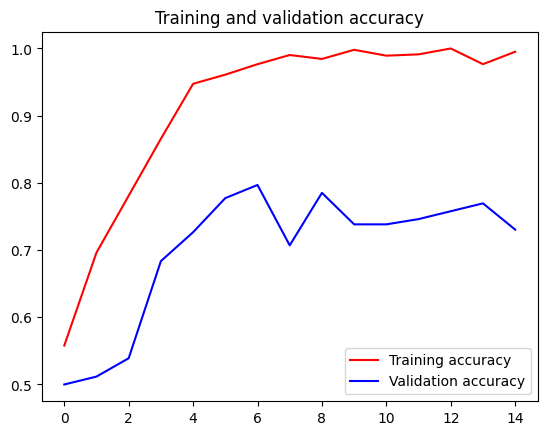

In [20]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

In [22]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(300, 300))
    image = tf.keras.utils.img_to_array(image)
    image = rescaled_layer(image)
    image = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image, verbose=0)[0][0]
    
    with out:
        if prediction > 0.5:
            print(filename + " is a human")
        else:
            print(filename + " is a horse")


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    
    items = change.new
    for item in items: # Loop if there is more than one file uploaded  
        file_jpgdata = BytesIO(item.content)
        file_predict(item.name, file_jpgdata, out)

# Run the interactive widget
# Note: it may take a bit after you select the image to upload and process before you see the output.
uploader.observe(on_upload_change, names='value')

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()